In [92]:
import os
import pyAgrum as gum
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
import pyAgrum.lib.notebook as gnb

bn = gum.fastBN("a->c<-b->d;c->e")
bn

(pyAgrum.BayesNet<double>@0x1580eb820e0) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 10, mem: 160o}

In [93]:
bn.cpt('a')[:] = [.4, .6]
bn.cpt('b')[:] = [.7, .3]

bn.cpt('d')[:] = [[.5, .5], [.6, .4]]
bn.cpt('c')[:] = [
    [
        [.2, .8],
        [.9, .1]
    ],
    [
        [.8, .2],
        [.3, .7]
    ]
]
bn.cpt('e')[:] = [[.4, .6], [.1, .9]]

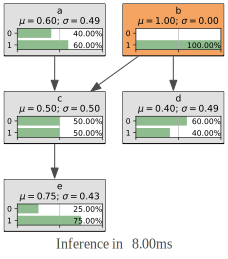

In [94]:
gnb.showInference(bn, evs={'b': '1'})

In [16]:
ie = gum.LazyPropagation(bn)
ie.addTarget('c')
ie.addEvidence('b', '1')
ie.makeInference()
ie.posterior('c')

(pyAgrum.Potential<double>@0x20fe441e4f0) 
  c                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [17]:
ie = gum.LazyPropagation(bn)
ie.addTarget('c')
ie.makeInference()
ie.posterior('c')

(pyAgrum.Potential<double>@0x20fe441e330) 
  c                |
0        |1        |
---------|---------|
 0.5840  | 0.4160  |

In [13]:
import os
import pyAgrum as gum
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
import pyAgrum.lib.notebook as gnb

id = gum.fastID("*T->$U;*T->X<-Y->$U2<-D<-X", 2)
id

(pyAgrum.InfluenceDiagram<double>@0x29b60dd2fe0) Influence Diagram{
  chance: 3,
  utility: 2,
  decision: 1,
  arcs: 6,
  domainSize: 16
}

In [14]:
[id.variable(x) for x in id.topologicalOrder()]

[(pyAgrum.DiscreteVariable@0x29b60dca5f0) Y:Range([0,1]),
 (pyAgrum.DiscreteVariable@0x29b60dcad70) T:Range([0,1]),
 (pyAgrum.DiscreteVariable@0x29b60dcab90) X:Range([0,1]),
 (pyAgrum.DiscreteVariable@0x29b60dc9ff0) D:Range([0,1]),
 (pyAgrum.DiscreteVariable@0x29b60dcaa10) U2:Range([0,0]),
 (pyAgrum.DiscreteVariable@0x29b60dcadd0) U:Range([0,0])]

In [23]:
mn = gum.fastMRF("a--b--c--f;b--i--c--d--b--i--d--e--i--g--h--i--e--g")
mn

(pyAgrum.MarkovRandomField<double>@0x29b60dd5090) MRF{nodes: 9, edges: 26, domainSize: 512, dim: 144}

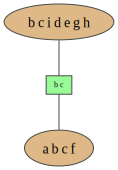

In [20]:
gnb.showJunctionTree(mn)